In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import glob
import pandas as pd
import numpy as np
import ast
import collections


In [4]:

infile = glob.glob("/home/isaac/gimmeSAD/1d_sims/*/megalog.txt")[0]
df = pd.read_csv(infile, sep="\t")
#print(df[df["mig_rate"] > 0])
sortdf = df.sort_values(by=["pi_island"], axis=0, ascending=False)
print(sortdf[:10])

            %eq     step  Species_uuid  Col_time  mig_rate  Loc_Abund  \
33841  0.674615  1510000           351    7400.0  0.000005        237   
51789  0.889551  3600000          8628   11800.0  0.000012        249   
48309  0.787763  2300000          5386    1200.0  0.000009         42   
6074   0.280733   360000          3810    1900.0  0.000018         39   
46183  0.737712  1990000          7940     100.0  0.000000          1   
40011  0.667641  1750000          7766    2600.0  0.000004         37   
3370   0.223934   240000          3810     500.0  0.000046          9   
37200  0.663480  1640000          8628     100.0  0.000000          5   
54288  0.918119  4500000          1302   20900.0  0.000012         90   
53752  0.912608  4300000          8628   19600.0  0.000013        193   

       Meta_Abund        pi    pi_net       Dxy   S  S_island  pi_island  \
33841       11800  0.059220  0.007754  0.062667  67        64   0.067018   
51789       20800  0.059298 -0.006632  0.056

This is a note to myself about why i made this setting
# wat

(1, 2, 4, 8, 16)
(11, 11, 8, 7, 7)


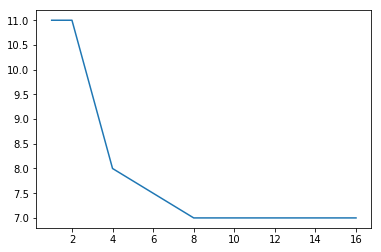

In [4]:
data = "[(1, 11), (2, 8), (3, 3), (4, 3), (5, 1), (6, 3), (7, 1), (8, 2), (9, 3), (12, 2), (16, 1), (17, 1), (19, 1), (20, 1), (23, 1), (25, 1), (31, 1), (33, 1), (38, 1), (54, 1), (55, 1), (83, 1)]"
datb = "[(1, 11), (2, 11), (4, 8), (8, 7), (16, 7)]"
abunds = collections.OrderedDict(ast.literal_eval(data))
octaves = collections.OrderedDict(ast.literal_eval(datb))
x, y = zip(*octaves.items())
print(x)
print(y)
plt.plot(x, y)


[83, 55, 54, 38, 33, 31, 25, 23, 20, 19, 17, 16, 12, 12, 9, 9, 9, 8, 8, 7, 6, 6, 6, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


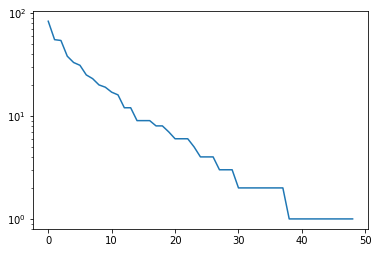

In [61]:
RAC = []
[RAC.extend([x] * abunds[x]) for x in abunds.keys()]
RAC = RAC[::-1]
print(RAC)
X = np.arange(0,len(RAC))
plt.semilogy(X, RAC, label="simulated")

nfiles - 160


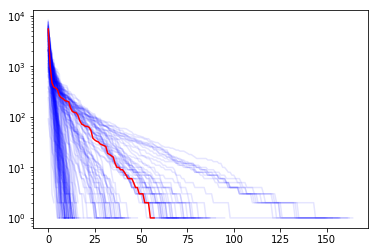

In [34]:
RACS = []
## get a bunch of them
files = glob.glob("/home/isaac/gimmeSAD/1d_sims/K_8*/gimmeSAD.out")
files = files[:200]
print("nfiles - {}".format(len(files)))
for f in files:
    dat = open(f).readlines()[1]
    dat = dat.split("-")[1].strip().split("[")[1].split(']')[0]
    #print(dat)
    abunds = collections.OrderedDict(ast.literal_eval(dat))
    RAC = []
    [RAC.extend([x] * abunds[x]) for x in abunds.keys()]
    RAC = sorted(RAC)
    RAC = RAC[::-1]
    RACS.append(RAC)

for i, RAC in enumerate(RACS):
    X = np.arange(0,len(RAC))
    plt.semilogy(X, RAC, label="simulated", alpha=0.1, color="b")
emp_abunds = list(ast.literal_eval("[5493, 1042, 471, 387, 374, 343, 263, 239, 228, 210, 204, 200, 150, 128, 123, 121, 107, 84, 72, 69, 65, 65, 62, 54, 38, 35, 33, 32, 29, 28, 27, 26, 19, 18, 17, 16, 12, 10, 10, 9, 9, 8, 7, 6, 6, 6, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1]"))
#emp_abunds = list(ast.literal_eval("[1042, 471, 387, 374, 343, 263, 239, 228, 210, 204, 200, 150, 128, 123, 121, 107, 84, 72, 69, 65, 65, 62, 54, 38, 35, 33, 32, 29, 28, 27, 26, 19, 18, 17, 16, 12, 10, 10, 9, 9, 8, 7, 6, 6, 6, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1]"))
X = np.arange(0,len(emp_abunds))
plt.semilogy(X, emp_abunds, color="r")

In [127]:
emp_1d_sgd = [8, 25, 7, 4, 1, 3, 2, 4, 1, 2]

# Plot RAC fuzz through time for 6 lambdas
## Load in abundances through time

In [47]:
import glob
import ast
import collections

#files = glob.glob("/home/isaac/gimmeSAD/1d_sims/K_9*0.001*/abundances.txt")
files = glob.glob("/home/isaac/gimmeSAD/origin_sims/all_sgd_sims_volcanic/K_10000-C_0.001*/abundances.txt")
RACS = []
for f in files[:10]:
    lines = open(f).readlines()
    tmp_racs = []
    for line in lines:
        try:
            ## Parse each line and get rid of bracket characters
            try:
                lamb = float(line.strip().split()[0])
                rdat = line.strip().split("[")[1].split(']')[0]
                abunds = collections.OrderedDict(ast.literal_eval(rdat))
                RAC = []
                [RAC.extend([x] * abunds[x]) for x in abunds.keys()]
                RAC = sorted(RAC)
                RAC = RAC[::-1]
            except Exception as inst:
                print(f, inst, line)
                pass
            tmp_racs.append([lamb] + RAC)
        except Exception as inst:
            print(inst)
    RACS.extend(tmp_racs)
print("Processed nracs {}".format(len(RACS)))
print(RACS[:2])


Processed nfiles 19239
[[0.0006, 3, 1, 1, 1], [0.0024, 8, 6, 2, 2, 1, 1, 1, 1, 1, 1]]


## Now we have to go through all the data and pick out timepoints that are "close"
## to our timepoints of interest

In [60]:
time_tolerance = 0.02
sampling_lambdas = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
maxsamps = 80000

## Dict for storing distributions per timepoint
lambda_dists = {perc:[] for perc in sampling_lambdas}
## Ineffecient but i don't care
for percent in sampling_lambdas:
    coltimes = []
    for line in RACS:
        ## If the difference between the lambda for each line
        ## is close enough to the sampling lambda we want then keep the coltimes
        if abs(line[0] - percent) < time_tolerance:
            m = np.array(line[2:])
            #p = m[m<0.2]
            #p = p[p>=0]
            coltimes.append(m)
    lambda_dists[percent] = coltimes[:maxsamps]
for k,v in lambda_dists.items():
    print("{} - {}\t".format(k, len(v))),


0.25 - 433	0.5 - 749	0.05 - 486	0.1 - 389	1 - 146	0.75 - 1243	

## Now plot the 6 panel figure

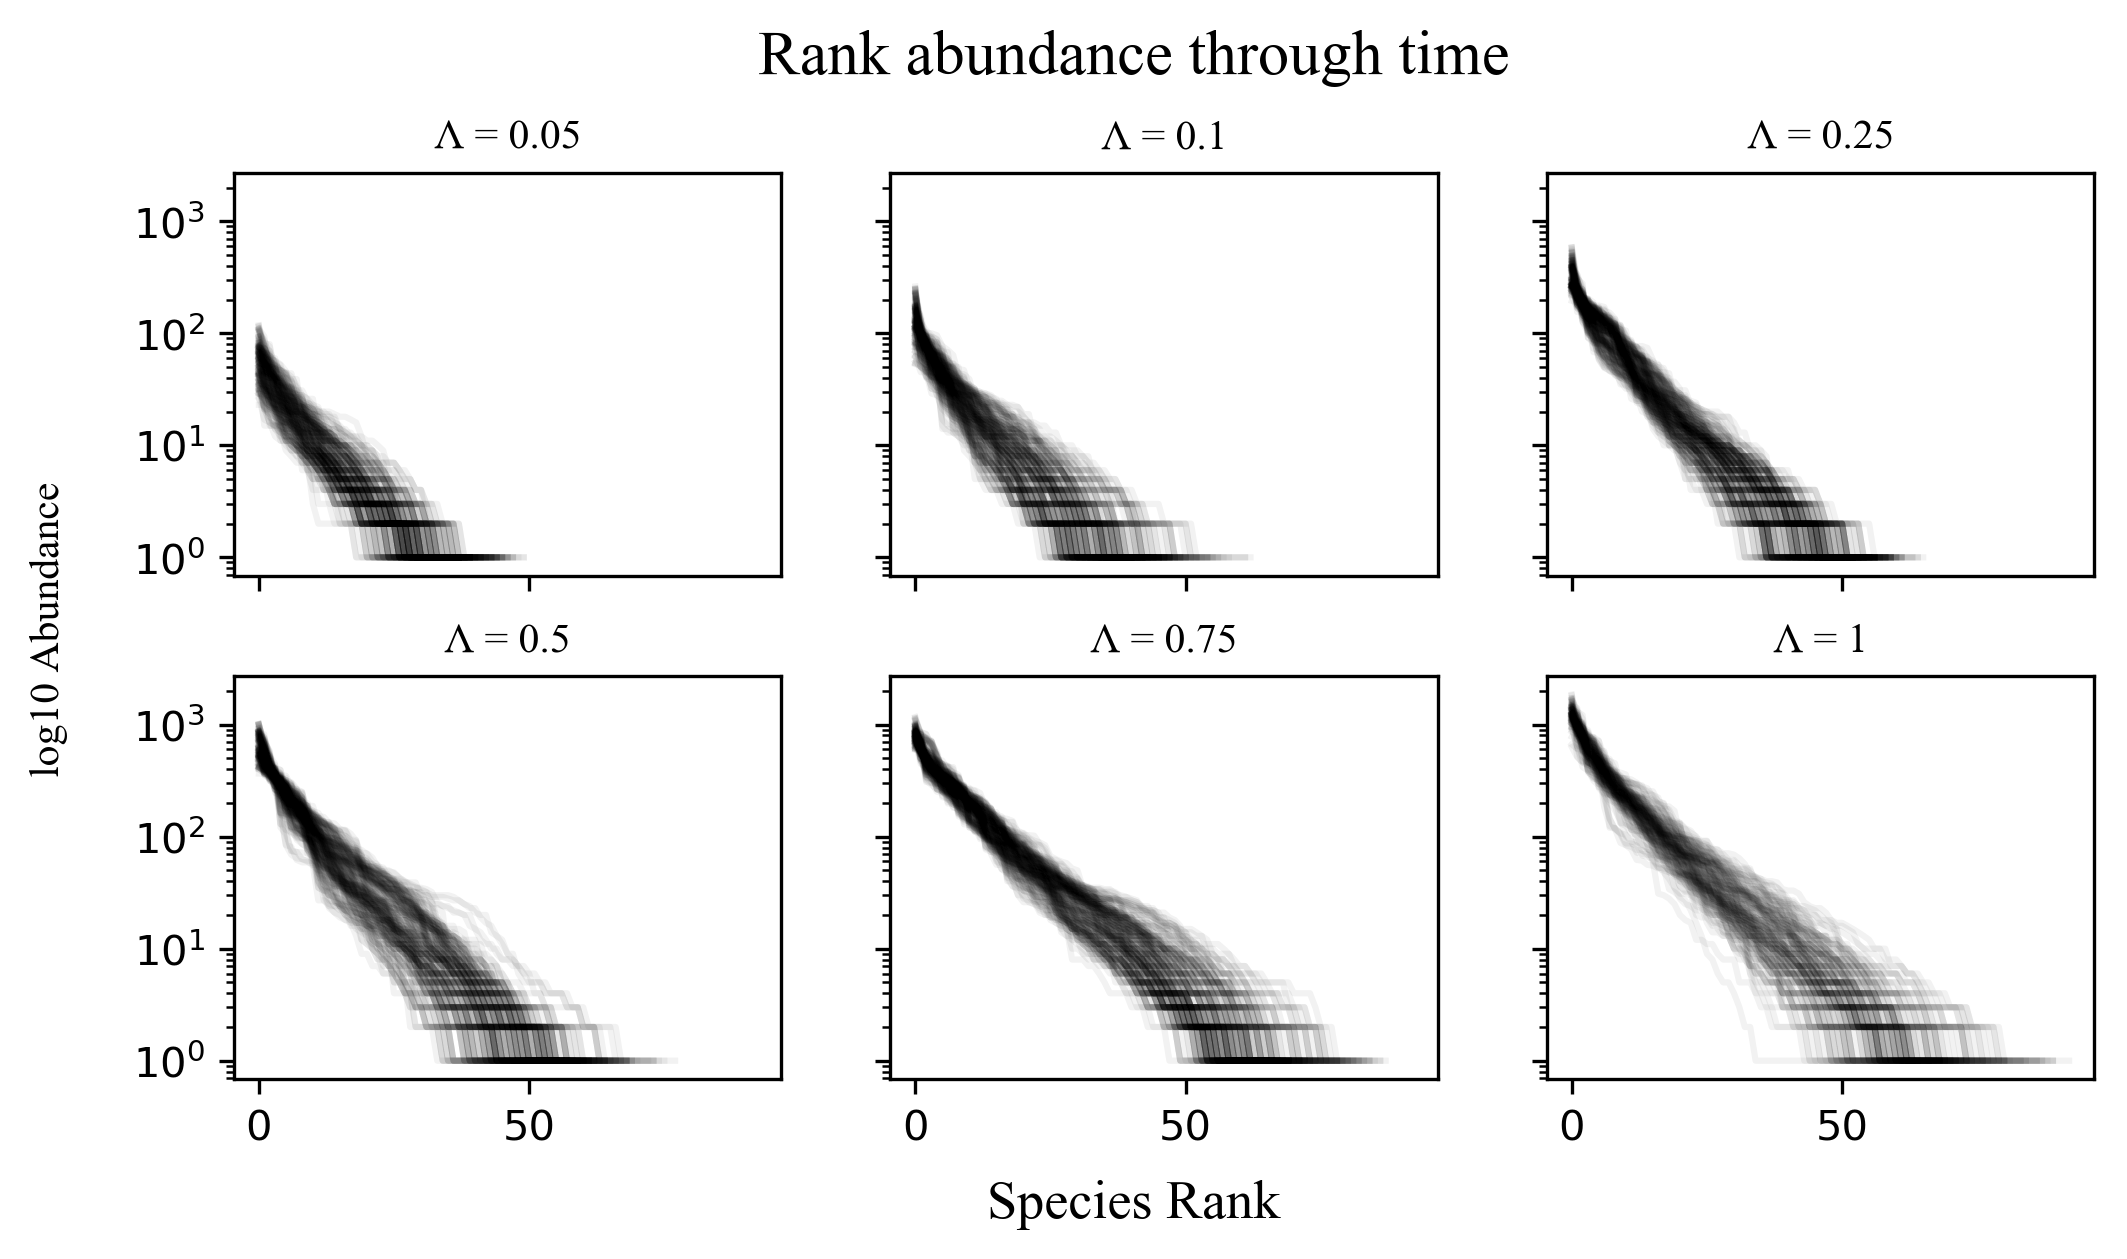

In [68]:
from matplotlib.font_manager import FontProperties
import matplotlib
matplotlib.font_manager._rebuild()

f, axarr = plt.subplots(2, 3, figsize=(8,4), dpi=300, sharex=True, sharey=True)
axarr = [a for b in axarr for a in b]

font = FontProperties()
font.set_family('Times New Roman')

for i, k, ax in zip(xrange(0,6), sampling_lambdas, axarr):
    try:
        ax.set_title(u"Λ = {}".format(k), fontsize=10, fontproperties=font)
        for rac in lambda_dists[k][:200]:
            X = np.arange(0,len(rac))
            ax.semilogy(X, rac, label="simulated", alpha=0.05, color="black")
    except Exception as inst:
        print(i, k, inst)
f.text(0.5, 0.01, u"Species Rank", ha='center', fontsize=13, fontproperties=font)
f.text(0.04, 0.5, r"log10 Abundance", va='center', rotation='vertical', fontsize=13, fontproperties=font)
font.set_size(15)
plt.suptitle("Rank abundance through time", y=.9999, fontproperties=font)
plt.subplots_adjust(hspace=.25)
plt.savefig("/home/isaac/gimmeSAD/Figure1-RACs.svg")

[468 467 427 404 376 376 290 276 259 229 216 208 195 195 187 147 143 119
 116 114 110 107 102 101 101 100 100  95  94  93  89  89  80  75  72  66
  66  65  64  61  60  59  53  47  46  46  42  41  40  40  38  37  37  37
  36  34  34  33  33  31  30  29  29  28  27  27  27  27  26  26  26  25
  22  22  21  21  19  18  18  18  17  16  16  16  15  14  14  13  12  12
  12  12  11  11  10  10  10  10   9   9   9   9   9   9   9   9   8   8
   8   8   8   7   7   7   7   6   6   6   6   6   6   6   5   5   5   5
   5   4   4   4   4   4   4   4   4   4   3   3   3   3   3   3   3   3
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1]
[array([2106, 1570, 1204,  389,  173,  146,   91,   79,   74,   69,   65,
         55,   48,   38,   38,   31,   30,   22,   21,   14,   14,   13,
         12,    7,    7,    6,    6,    6,    5,    5,    5,    5,   

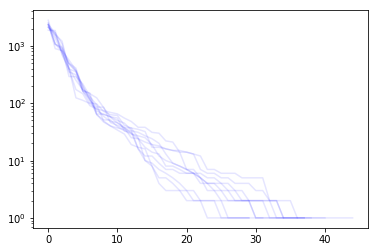

In [45]:
font.set_
racs = lambda_dists[1]
RAC = racs[0]
print(RAC)
for i, RAC in enumerate(racs[70:80]):
    X = np.arange(0,len(RAC))
    plt.semilogy(X, RAC, label="simulated", alpha=0.1, color="b")
print(racs[70:80])